# Testing scVelo

We will use a toy dataset

### Setup

The setup was a mess, I had to uninstall virtualenv which was bound to python2, and reinstall python3, and then source everything through a virtualenv, where things then worked

In [1]:
import scvelo as scv
scv.set_figure_params()

In [2]:
adata = scv.datasets.pancreas()

In [4]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [5]:
scv.tl.velocity(adata, mode='stochastic')

computing velocities
    finished (0:00:07) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [6]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:24) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


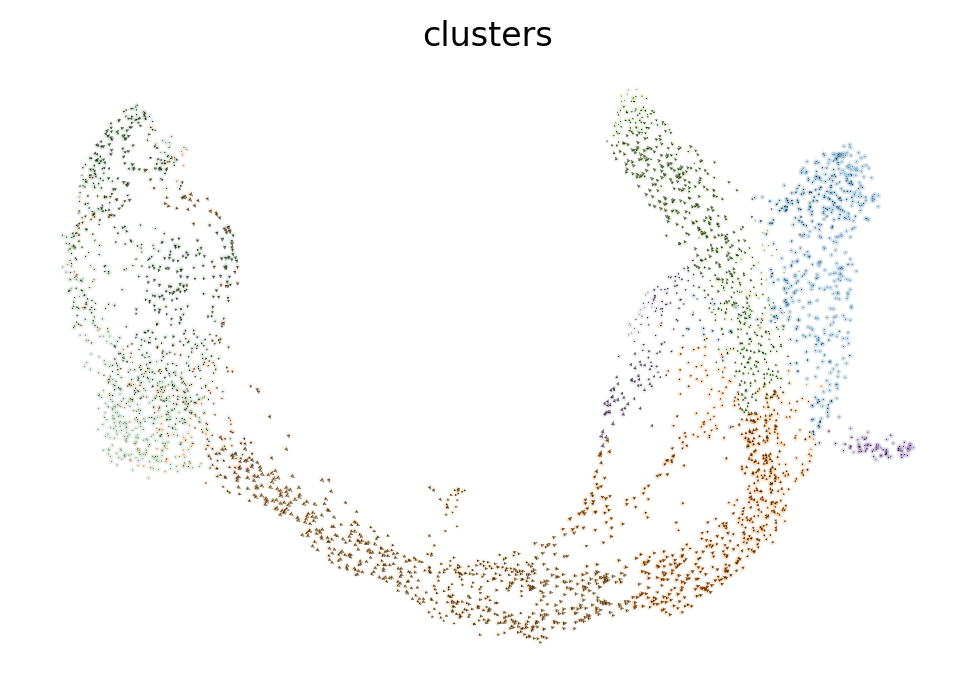

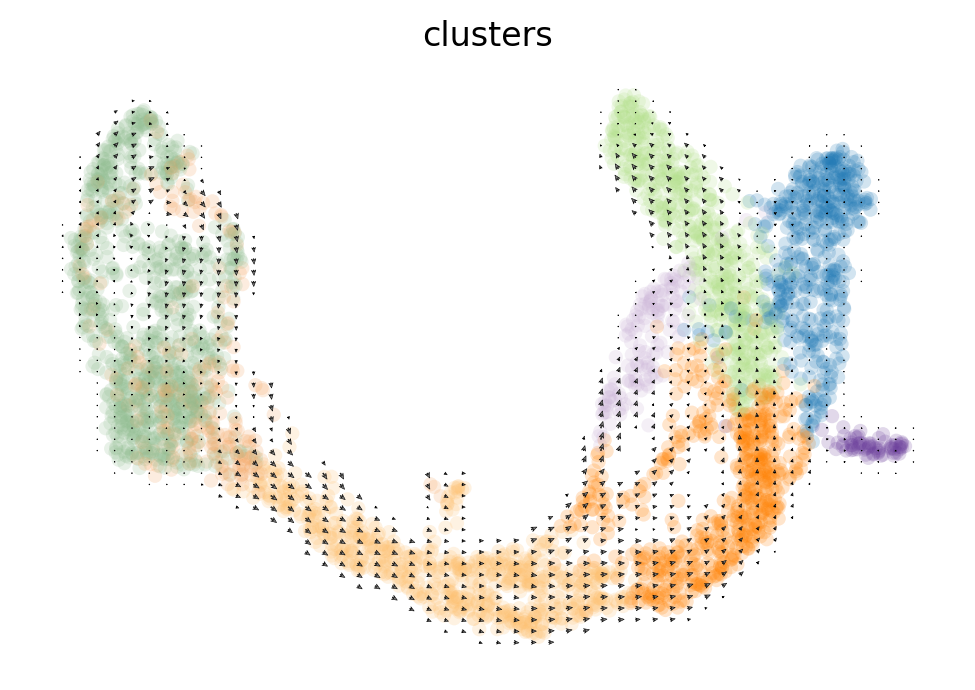

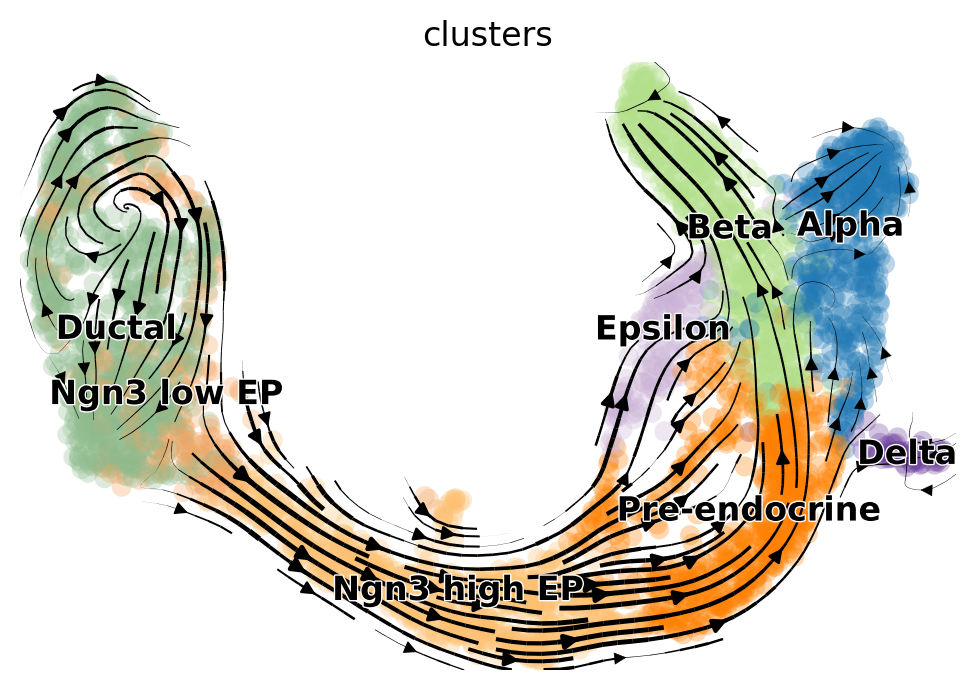

In [7]:
scv.pl.velocity_embedding(adata, basis='umap')
scv.pl.velocity_embedding_grid(adata, basis='umap')
scv.pl.velocity_embedding_stream(adata, basis='umap')

In [9]:
adata.var

,highly_variable_genes,gene_count_corr,velocity_gamma,velocity_r2,velocity_genes
index,,,,,
Xkr4,False,0.0052,8.156821,-0.904921,False
Gm37381,NaN,NaN,0.000000,0.000000,False
Rp1,NaN,NaN,0.000000,-0.008325,False
Rp1-1,NaN,NaN,0.000000,0.000000,False
Sox17,NaN,NaN,0.000000,0.000000,False
...,...,...,...,...,...
Gm28672,NaN,NaN,0.000000,0.000000,False
Gm28670,NaN,NaN,0.000000,0.000000,False
Gm29504,NaN,NaN,0.000000,0.000000,False


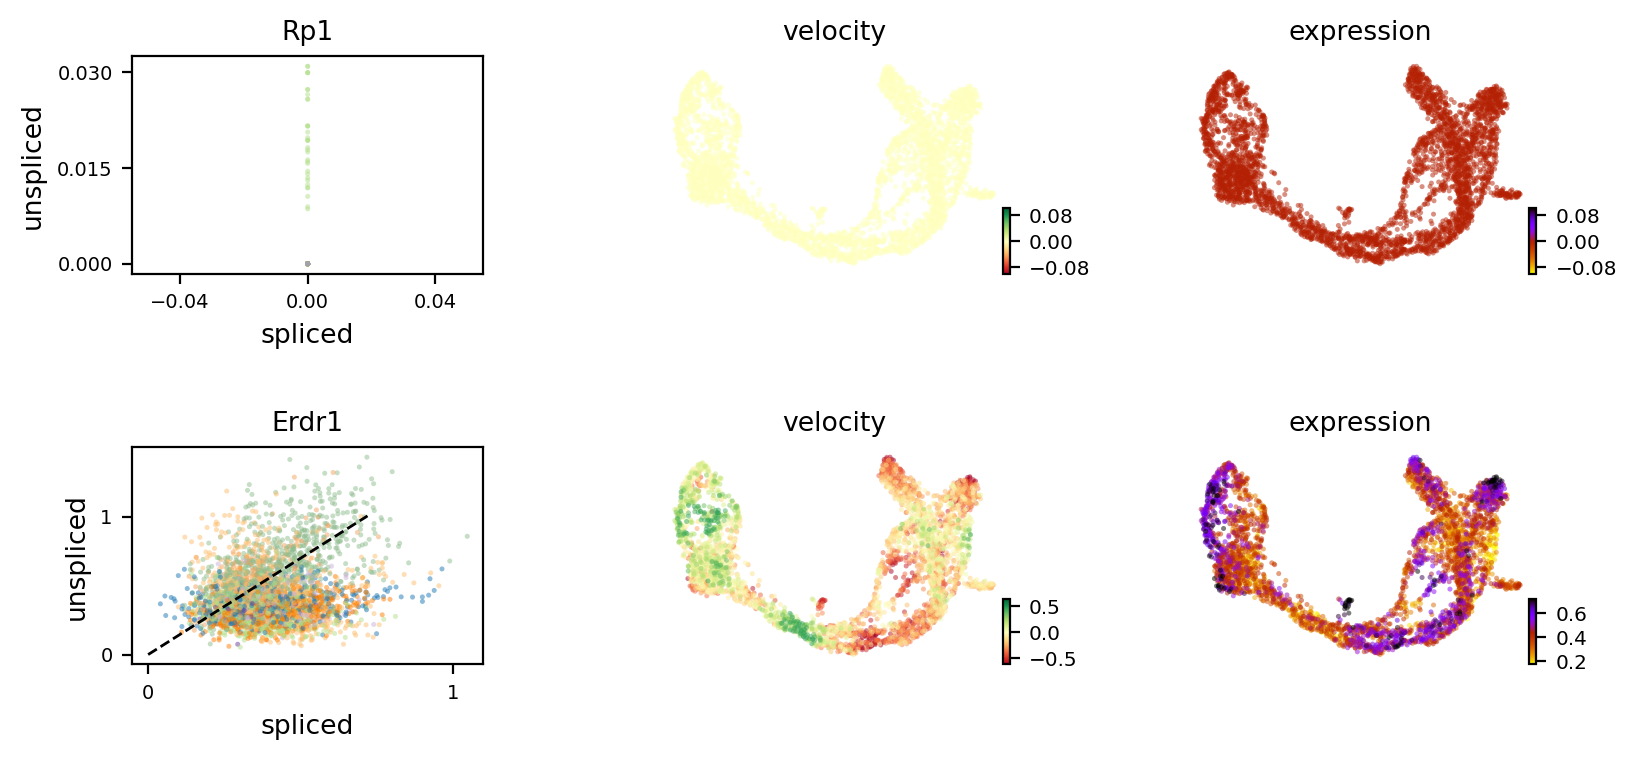

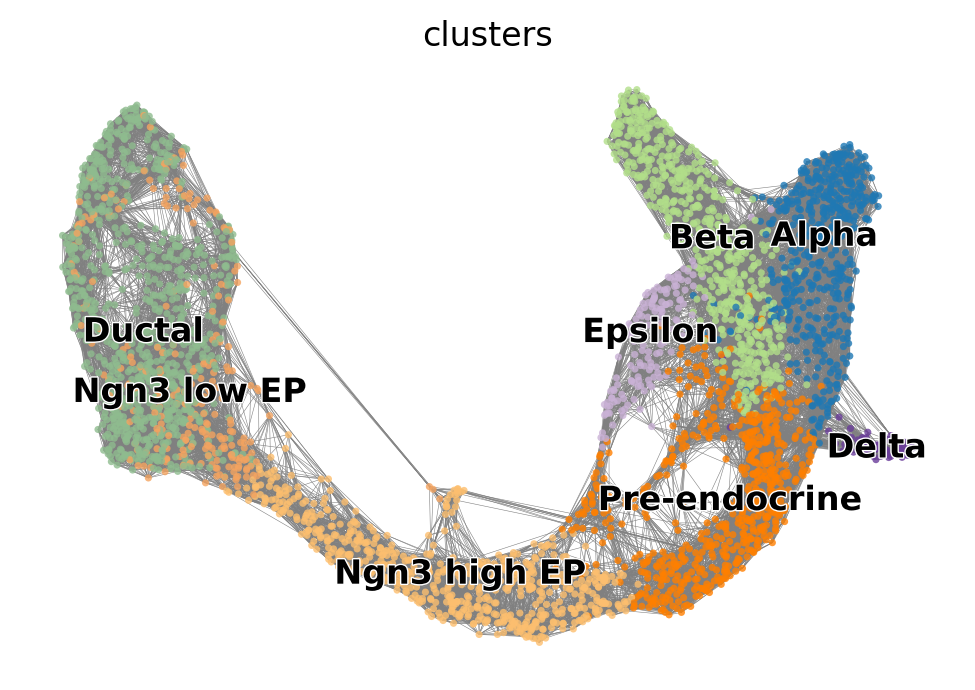

In [10]:
scv.pl.velocity(adata, var_names=['Rp1', 'Erdr1'])
scv.pl.velocity_graph(adata)

Okay, seems to work

Let's next try this with some real data